# Continut
## [1. Detectia outliers](#1)
### [1.1. Cu utilizarea limitelor si cuartilelor](#11)
### [1.2. Cu utilizarea corelatiei dintre caracteristici](#12)
## [2. Tratarea datelor lipsa](#2)
### [2.1. Detectarea si vizualizarea procentajului datelor lipsa](#21)
### [2.2. Completarea sau stergerea datelor lipsa pe linie](#22)
### [2.3. Completarea sau stergerea datelor lipsa pe coloane](#23)
## [3. Procesarea datelor categoriale](#3)


<a id='1'></a>
# 1. Detectia outliers 

<a id='11'></a>
## 1.1. Cu utilizarea limitelor si cuartilelor

In [1]:
# importul bibliotecilor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# definirea unei functii ce va crea o lista de valori aliatoare distribuite normat
def crarea_varsta(media=50, sigma=13, numar_esantioane=100, seed=42):
    
    np.random.seed(seed)
    
    esantion_varsta = np.random.normal(loc=media, scale = sigma, size=numar_esantioane)
    esantion_varsta = np.round(esantion_varsta,decimals=0)
    
    return esantion_varsta

In [6]:
# apelarea functie si crarea esantionului de valori
sample = crarea_varsta()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

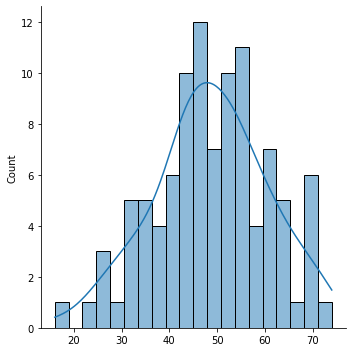

In [8]:
# vizualzizarea distributiei
sns.displot(sample,bins =20, kde=True)

<AxesSubplot:>

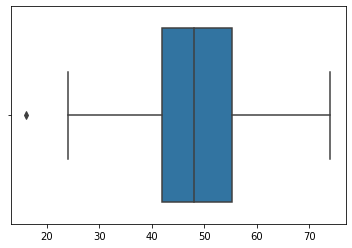

In [10]:
# vizualizara cuartilelor esantionului
sns.boxplot(x=sample)

In [12]:
# conversia esantionului in serie pandas
serie = pd.Series(sample)
serie

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [13]:
# vizualizarea datelor statistice despre serie
serie.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [15]:
# determinarea manuala a limitelor conform datelor statistice ale serie
IQR = 55.25-42
limita_jos = 42-1.5*IQR
limita_sus = 55.25+1.5*IQR
limita_jos, limita_sus

(22.125, 75.125)

In [19]:
# determinarea numarului de elemente mai mari de limita inferioara
serie[(serie>limita_jos)]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [20]:
# determinarea numarului de elemente mai mici de limita superioara
serie[(serie<limita_sus)]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [22]:
# determinarea programabila a limitelor cu ajutorul functie `percentile()` din np
limit_inf, limit_sup = np.percentile(sample,[25, 75])
limit_inf, limit_sup

(42.0, 55.25)

<a id='12'></a>
## 1.2. Cu utilizarea corelatiei dintre caracteristici

In [23]:
# importul unui set de date Ames_Housing_Data.csv
df = pd.read_csv('Ames_Housing_Data.csv')

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
# determinarea corealatiei dintre coloane
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [29]:
# determinarea corealatiei dintre coloana SalePrice si restul coloanelor si sortarea rezultatelor
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

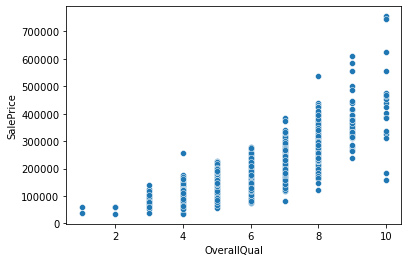

In [30]:
# vizualziarea dependentei coloanei SalePrice de coloana OverallQual
sns.scatterplot(data=df, x="OverallQual", y="SalePrice")

In [33]:
# detectarea posibilelor outliers dupa criteriul OverallQual
df[(df['OverallQual']>8) & (df['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

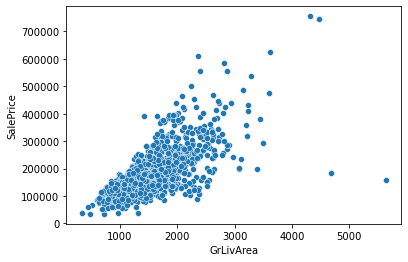

In [31]:
# vizualizarea dependentei coloanei SalePrice de coloana GrLivArea
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

In [34]:
# detectarea posibilelor outliers dupa criteriul GrLivArea
df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [35]:
# Obtinera indexilor pentru outliers
index_outliers = df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)].index
index_outliers

Int64Index([523, 1298], dtype='int64')

In [36]:
# exluderea ourliers din setul de date
df = df.drop(index_outliers, axis=0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

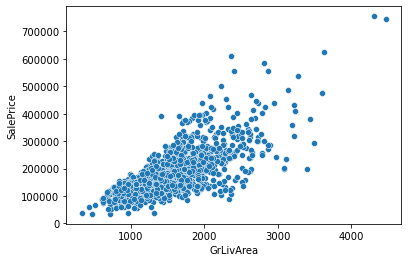

In [37]:
# revizualizarea dependentei coloanei SalePrice de coloana GrLivArea
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

In [38]:
# salvarea noului set de date
df.to_csv("Ames_outliers_removed.csv")

<a id='2'></a>
# 2. Tratarea datelor lipsa

<a id='21'></a>
## 2.1. Detectarea si vizualizarea procentajului datelor lipsa

In [39]:
# citirea datelor din fisierul de descrie a setului de date `data description.txt`
with open('data description.txt', "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [46]:
# incarcarea setului de date fara outliers
df = pd.read_csv('Ames_outliers_removed.csv', index_col=[0])

In [41]:
# afisarae informatiei despre set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1458 non-null   int64  
 1   Id             1458 non-null   int64  
 2   MSSubClass     1458 non-null   int64  
 3   MSZoning       1458 non-null   object 
 4   LotFrontage    1199 non-null   float64
 5   LotArea        1458 non-null   int64  
 6   Street         1458 non-null   object 
 7   Alley          91 non-null     object 
 8   LotShape       1458 non-null   object 
 9   LandContour    1458 non-null   object 
 10  Utilities      1458 non-null   object 
 11  LotConfig      1458 non-null   object 
 12  LandSlope      1458 non-null   object 
 13  Neighborhood   1458 non-null   object 
 14  Condition1     1458 non-null   object 
 15  Condition2     1458 non-null   object 
 16  BldgType       1458 non-null   object 
 17  HouseStyle     1458 non-null   object 
 18  OverallQ

In [42]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
# stergerea coloanei Id
df = df.drop("Id", axis=1)

In [48]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
# determinarea numarului de date lipsa pe fiecare coloana
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [59]:
# crearae unei functii care va returna doar coloanele cu date lipsa si prcentajula acestora
def procentaj_lipsa(df):
    procentaj = 100*df.isnull().sum()/len(df)
    procentaj = procentaj[procentaj>0].sort_values(ascending=False)
    return procentaj

In [60]:
# vdeterminarea coloanelor cu lipsuri si procentajul acestora
procent_nan = procentaj_lipsa(df)
procent_nan

PoolQC          99.588477
MiscFeature     96.296296
Alley           93.758573
Fence           80.727023
FireplaceQu     47.325103
LotFrontage     17.764060
GarageType       5.555556
GarageYrBlt      5.555556
GarageFinish     5.555556
GarageQual       5.555556
GarageCond       5.555556
BsmtExposure     2.606310
BsmtFinType2     2.606310
BsmtFinType1     2.537723
BsmtCond         2.537723
BsmtQual         2.537723
MasVnrArea       0.548697
MasVnrType       0.548697
Electrical       0.068587
dtype: float64

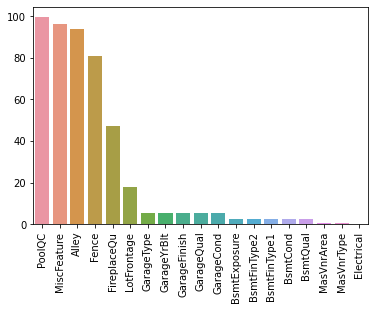

In [61]:
# Vizuazlizara grafica a procentajului datelor lipsa
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90);

<a id='22'></a>
## 2.2. Completarea sau stergerea datelor lipsa pe linie

(0.0, 1.0)

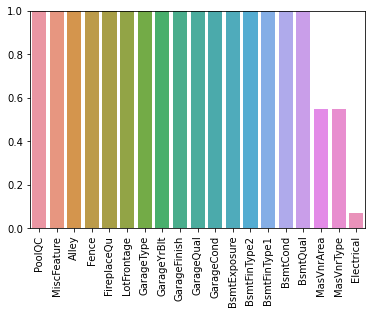

In [62]:
# Vizuazlizara grafica a procentajului datelor lipsa cu limitarea pana la 1%
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [63]:
# vizualizarea coloanelor cu lipsuri mai mici de 1%
procent_nan[procent_nan < 1]

MasVnrArea    0.548697
MasVnrType    0.548697
Electrical    0.068587
dtype: float64

In [64]:
# afisarea datelor unde coloana Electrical este nula
df[df["Electrical"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1377,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [65]:
# afisarea datelor unde coloana MasVnrType este nula
df[df["MasVnrType"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
528,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
649,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
935,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
972,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
976,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1242,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1277,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [66]:
# afisarea datelor unde coloana MasVnrType este nula
df[df["MasVnrArea"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
528,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
649,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
935,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
972,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
976,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1242,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1277,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [67]:
# stergerea liniei cu date lipsa in coloana Electrical
df = df.dropna(axis=0, subset=['Electrical'])

In [69]:
# actualizarea datelor
procent_nan = procentaj_lipsa(df)
procent_nan[procent_nan < 1]

MasVnrArea    0.549073
MasVnrType    0.549073
dtype: float64

(0.0, 1.0)

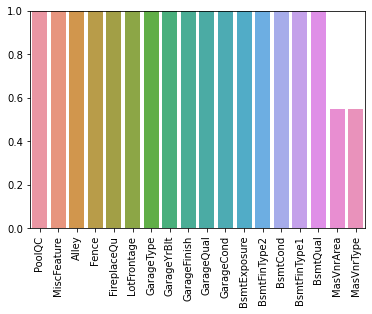

In [70]:
# revizuazlizara grafica a procentajului datelor lipsa cu limitarea pana la 1%
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [71]:
# completarea datelor lipsa in coloana MasVnrType cu valoarea None
df['MasVnrType']= df["MasVnrType"].fillna("None")

C:\Users\Nicolaev\AppData\Local\Temp/ipykernel_14776/2523655022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrType']= df["MasVnrType"].fillna("None")


In [72]:
# completarea datelor lipsa in coloana MasVnrType cu valoarea 0
df['MasVnrArea']= df["MasVnrArea"].fillna(0)

C:\Users\Nicolaev\AppData\Local\Temp/ipykernel_14776/3981535605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MasVnrArea']= df["MasVnrArea"].fillna(0)


In [75]:
# actualizarea datelor
procent_nan = procentaj_lipsa(df)

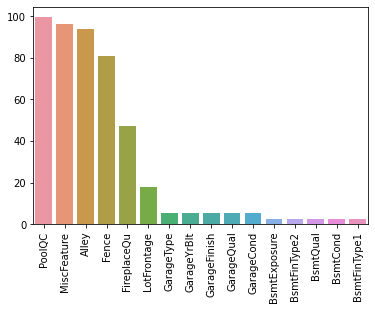

In [77]:
# revizuazlizara grafica a procentajului datelor lipsa 
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90);

<a id='23'></a>
## 2.3. Completarea sau stergerea datelor lipsa pe coloana

In [78]:
# vizualizarea coloanelor cu lipsuri mai mici de 10%
procent_nan[procent_nan < 10]

GarageType      5.559369
GarageYrBlt     5.559369
GarageFinish    5.559369
GarageQual      5.559369
GarageCond      5.559369
BsmtExposure    2.608099
BsmtFinType2    2.608099
BsmtQual        2.539465
BsmtCond        2.539465
BsmtFinType1    2.539465
dtype: float64

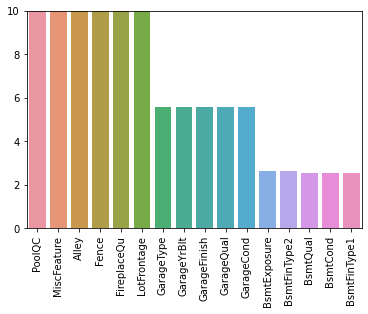

In [79]:
# vizuazlizara grafica a procentajului datelor lipsa cu limitarea pana la 10%
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90)
plt.ylim(0,10);

In [80]:
# crearea unei liste cu numele coloanelor categoriale cu un procentaj de lipsuri mai mic de 10%
lips_str_col = ['BsmtFinType1','BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtExposure', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'  ]

In [81]:
# completarea datelor lipsa in tote coloanele listei create cu valoarea None
df[lips_str_col]= df[lips_str_col].fillna('None')

C:\Users\Nicolaev\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [82]:
# actualizarea datelor
procent_nan = procentaj_lipsa(df)

In [83]:
# revizualizarea coloanelor cu lipsuri mai mici de 10%
procent_nan[procent_nan < 10]

GarageYrBlt    5.559369
dtype: float64

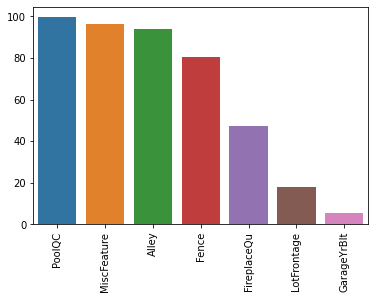

In [85]:
# revizuazlizara grafica a procentajului datelor lipsa 
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90);

In [86]:
# completarea datelor lipsa in coloana GarageYrBlt cu valoarea 0
df['GarageYrBlt']= df["GarageYrBlt"].fillna(0)

C:\Users\Nicolaev\AppData\Local\Temp/ipykernel_14776/3711747783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageYrBlt']= df["GarageYrBlt"].fillna(0)


In [87]:
# actualizarea datelor
procent_nan = procentaj_lipsa(df)

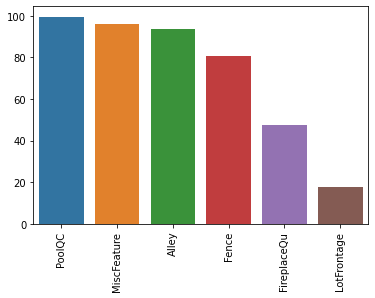

In [88]:
# revizuazlizara grafica a procentajului datelor lipsa 
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90);

In [90]:
# vizualizarea coloanelor cu lipsuri mai mult de 80%
procent_nan[procent_nan > 80]

PoolQC         99.588195
MiscFeature    96.293754
Alley          93.754290
Fence          80.713795
dtype: float64

In [91]:
# stergerea coloanelor cu lipsuri mai mult de 80%
df=df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [92]:
# actualizarea datelor
procent_nan = procentaj_lipsa(df)

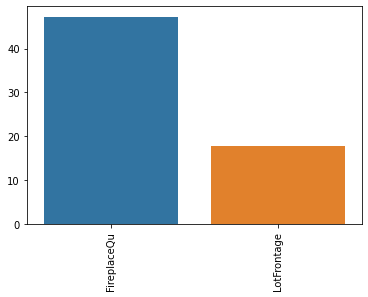

In [93]:
# revizuazlizara grafica a procentajului datelor lipsa 
sns.barplot(x=procent_nan.index, y =procent_nan)
plt.xticks(rotation=90);

In [94]:
# vizuazliarea numarului de valori a coloanei FireplaceQu
df["FireplaceQu"].value_counts()

Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [95]:
# completarea datelor lipsa in coloana FireplaceQu cu valoarea None
df['FireplaceQu']= df['FireplaceQu'].fillna('None')

In [96]:
# vizuazliarea datelor a coloanei LotFrontage
df["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1453    62.0
1454    85.0
1455    66.0
1456    68.0
1457    75.0
Name: LotFrontage, Length: 1457, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

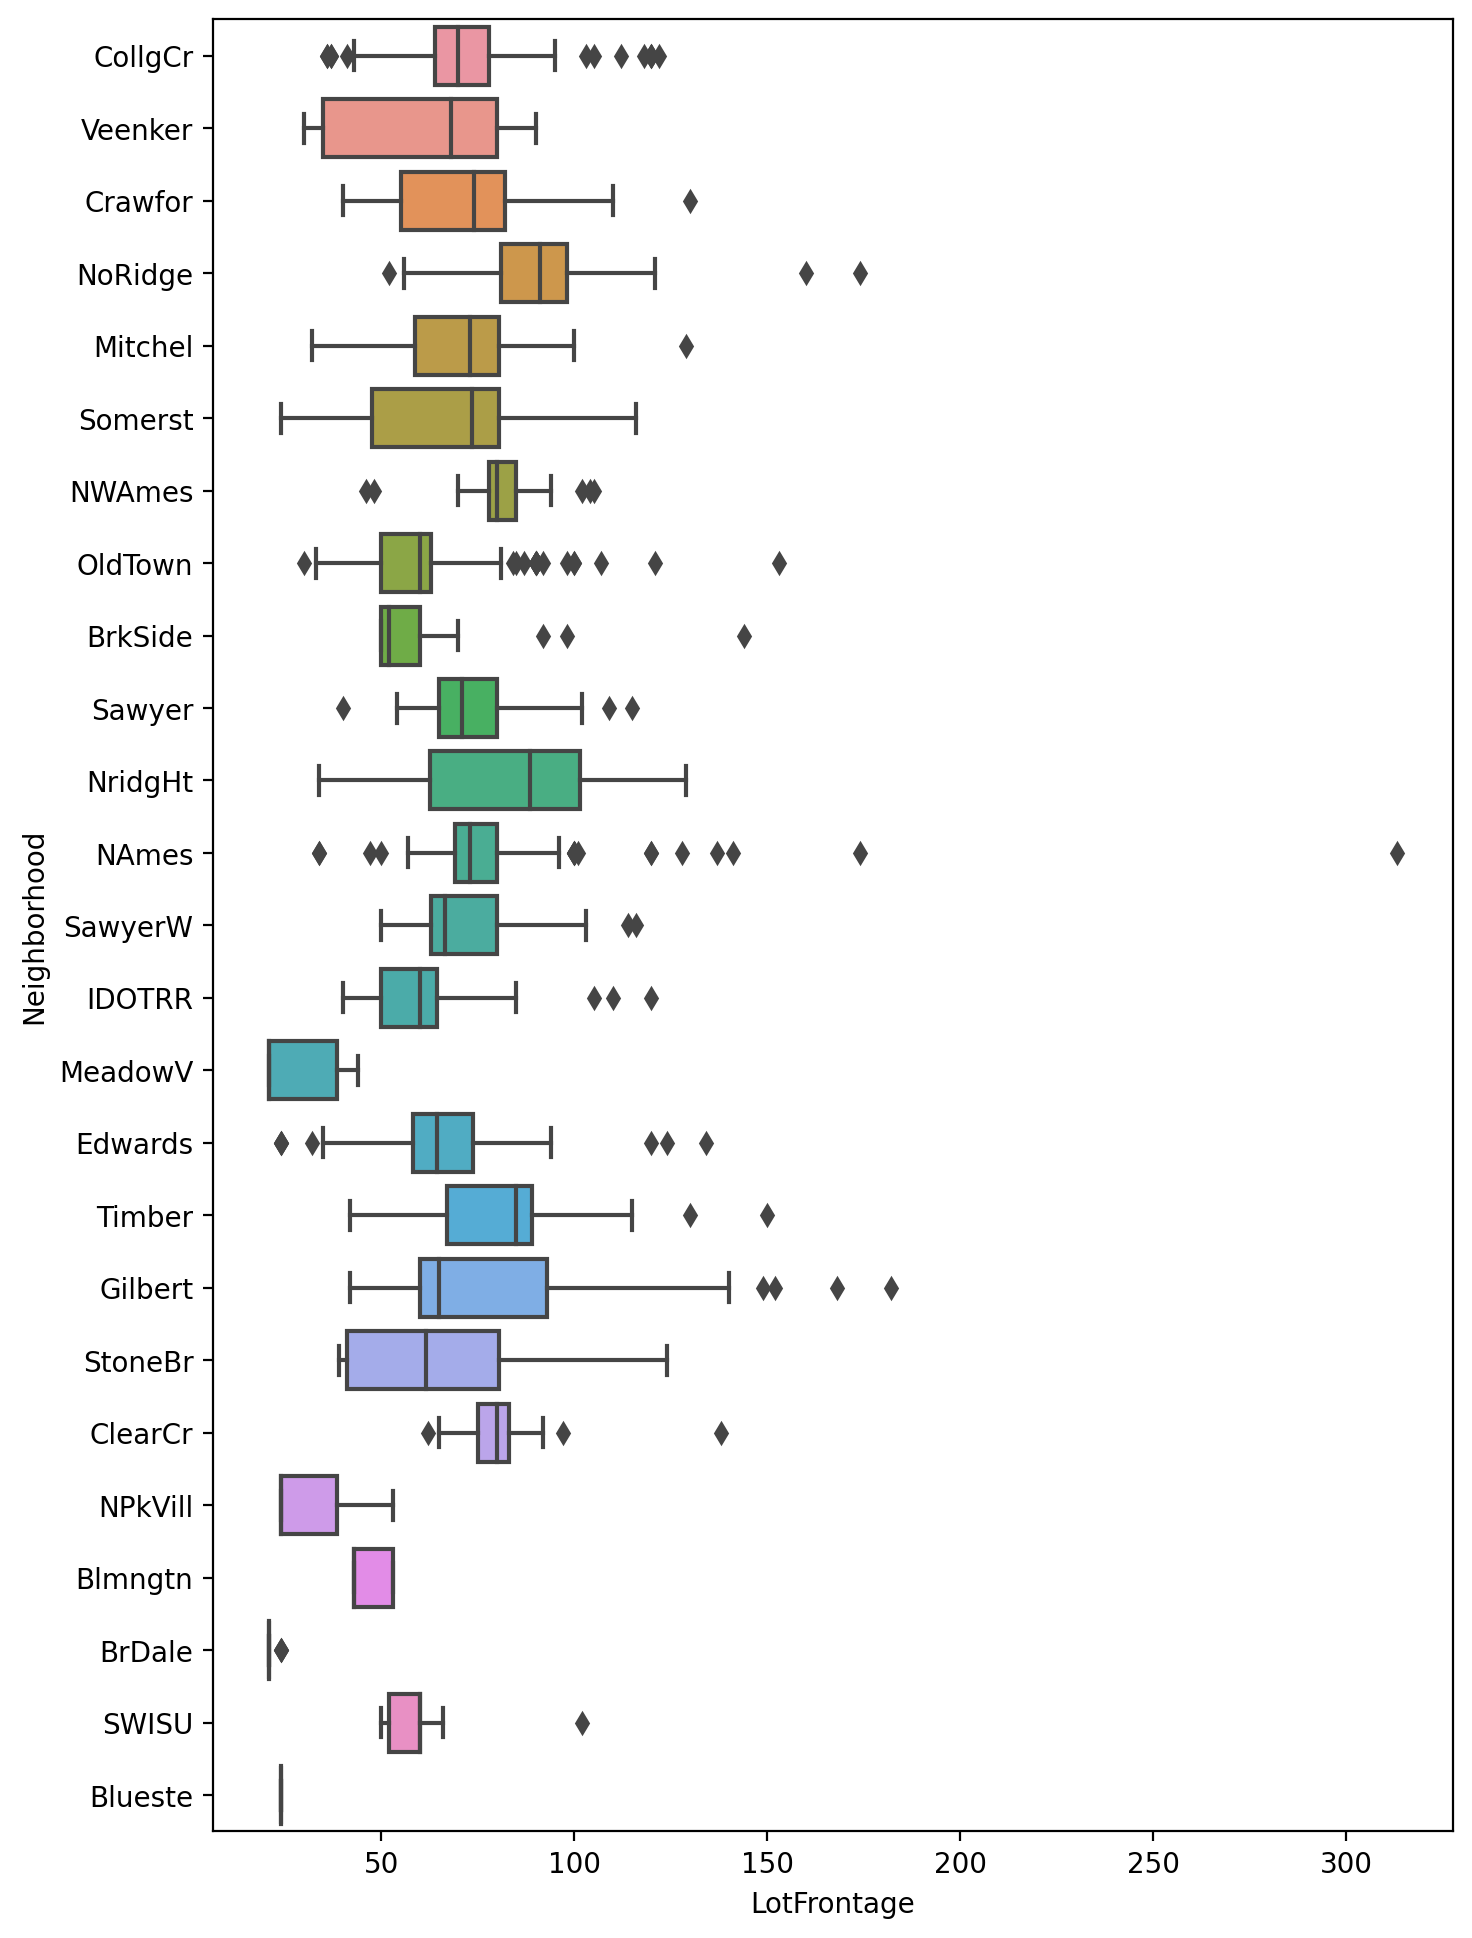

In [97]:
# vizuazliarea dependentei coloanei LotFrontage de coloana Neighborhood
plt.figure(figsize=(8,12), dpi=200)
sns.boxplot(data=df, x= 'LotFrontage', y = 'Neighborhood')

In [98]:
# Determinarea valorilor medii din colana LotFrontage in funtie de valorile coloanei Neighborhood
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [100]:
# Completarea valorilor lipsa in coloana LotFrontage cu valorile medii in funtie de valorile coloanei Neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [103]:
# actualizarea datelor
procent_nan = procentaj_lipsa(df)
procent_nan

Series([], dtype: float64)

In [104]:
# salvarea noului set de date
df.to_csv("Ames_NO_missing_data.csv")

<a id='3'></a>
# 3. Procesarea datelor categoriale

In [105]:
# citirea datelor din fisierul de descrie a setului de date `data description.txt`
with open('data description.txt', "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [112]:
# incarcarea setului de date fara outliers si fara date lipsa
df = pd.read_csv('Ames_NO_missing_data.csv', index_col=[0])

In [113]:
# verificarea tipului de date a coloanei MSSubClass
df['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1453    60
1454    20
1455    70
1456    20
1457    20
Name: MSSubClass, Length: 1457, dtype: int64

In [114]:
# verificarea tipului de date cateoriale intregi a coloanei MSSubClass in tip string
df['MSSubClass']= df['MSSubClass'].apply(str)

In [115]:
# selectarea tuturor coloanelor cu date de tip categoriale
categ_df = df.select_dtypes(include='object')
categ_df

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1454,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1455,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal


In [116]:
# selectarea tuturor coloanelor cu date de tip numerice
num_df = df.select_dtypes(exclude='object')
num_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1454,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1455,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1456,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [118]:
# stransforamrea coloanelor categoriale in coloane numerice cu ajutorul functiei get_dummies
trans_categ_df = pd.get_dummies(categ_df, drop_first=True)
trans_categ_df

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1454,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [120]:
# alipirea coloanelor categoriale transformate la coloanele numerice initiale
final_df = pd.concat([num_df, trans_categ_df], axis=1)
final_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,0,1,0,0,0,1,0
1454,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,0,1,0,0,0,1,0
1455,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,0,1,0,0,0,1,0
1456,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,0,1,0,0,0,1,0


In [122]:
# determinarea corelatieie dintre coloana SalePrice si celelalte coloane
final_df.corr()["SalePrice"].sort_values()

ExterQual_TA       -0.589947
KitchenQual_TA     -0.520124
FireplaceQu_None   -0.472413
BsmtQual_TA        -0.453018
GarageFinish_Unf   -0.411144
                      ...   
GarageCars          0.641111
TotalBsmtSF         0.651553
GrLivArea           0.734962
OverallQual         0.795863
SalePrice           1.000000
Name: SalePrice, Length: 259, dtype: float64

In [123]:
# salvarea noului set de date
df.to_csv("Ames_NO_categorical_data.csv")